In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans, MeanShift, SpectralClustering
from sklearn import metrics

In [57]:
data = sns.load_dataset('penguins')
data.dropna(inplace=True)
data.head()

# indep.var(data, X) = bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
# dep.var.(data, y) : island

# AdaBoostClassifier
# - estimator : default
# - estimater : SGDClassifier, n_estiamtor=100

# bill_length_mm, bill_depth_mm --> sns.relplot(), hue=spec
# KMeans 군집화 3개, species 제대로 나누는지 homogeniety_score

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [58]:
X = data.iloc[:, 2:6]
y = data.iloc[:, 0].astype('category').cat.codes

ss = StandardScaler().fit(X)
ss.transform(X)

le = LabelEncoder().fit(y)
y = le.transform(y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 10)

In [60]:
classifiers = [AdaBoostClassifier(), SGDClassifier(loss = 'log_loss'), AdaBoostClassifier(n_estimators = 100)]
classifier_names = ['adaboost', 'sgdclassifier', 'adaboost_estimator']

for a, b in zip(classifiers, classifier_names):
    m = a
    m.fit(X_train, y_train)
    print('-----------', b, '-------------')
    print('Train score : ', m.score(X_train, y_train))
    print('Test score : ', m.score(X_test, y_test))

----------- adaboost -------------
Train score :  0.8112449799196787
Test score :  0.7738095238095238
----------- sgdclassifier -------------
Train score :  0.20883534136546184
Test score :  0.20238095238095238
----------- adaboost_estimator -------------
Train score :  0.8112449799196787
Test score :  0.7738095238095238


In [67]:
m2 = AdaBoostClassifier(estimator = SGDClassifier(), n_estimators = 100, algorithm='SAMME')
m2.fit(X_train, y_train)

print('Train score : ', m2.score(X_train, y_train))
print('Test score : ', m2.score(X_test, y_test))

Train score :  0.5100401606425703
Test score :  0.5119047619047619


In [61]:
X = X.iloc[:, 0:2] 
y = data.iloc[:, 0].astype('category').cat.codes

In [70]:
models = [KMeans(n_clusters = 3, n_init = 'auto'), MeanShift(), SpectralClustering(n_clusters = 3)]

for m in models:
    m.fit(X)
    print('------', m)
    #"print(m.labels_)
    print(metrics.homogeneity_score(y, m.labels_))

------ KMeans(n_clusters=3, n_init='auto')
0.546016244591003
------ MeanShift()
0.49969920669383106
------ SpectralClustering(n_clusters=3)
0.6509731440567795


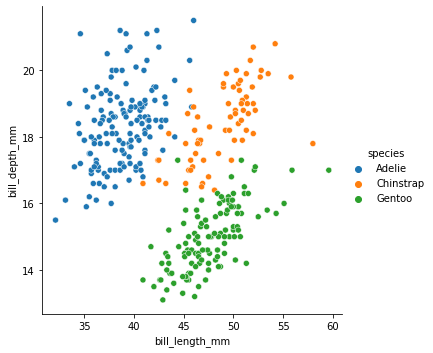

In [63]:
sns.relplot(data = data, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')